In [1]:
from netCDF4 import Dataset

file_path = '/home/vhsingh/openfoam10-run/.cache/huggingface/hub/datasets--camlab-ethz--CE-RP/snapshots/8e41d262cf3e26d1f6a9fce0047d9c3e4d4aea4e/data_0.nc'
nc = Dataset(file_path, 'r')

print("Variables in the dataset:")
print(nc.variables.keys())

Variables in the dataset:
dict_keys(['data'])


In [2]:
velocity = nc.variables['data']

print("Shape of the 'data' variable:", velocity.shape)
print("Dimensions of the 'data' variable:", velocity.dimensions)


Shape of the 'data' variable: (715, 21, 5, 128, 128)
Dimensions of the 'data' variable: ('sample', 'time', 'channel', 'x', 'y')


In [3]:
trajectory_index = 0 
time_step = 1 

density = velocity[trajectory_index, time_step, 0, :, :]
u_velocity = velocity[trajectory_index, time_step, 1, :, :]  
v_velocity = velocity[trajectory_index, time_step, 2, :, :]
pressure =  velocity[trajectory_index, time_step, 3, :, :]

print("Shape of density:", u_velocity.shape)
print("Shape of u_velocity:", u_velocity.shape)
print("Shape of v_velocity:", v_velocity.shape)
print("Shape of Pressure is", pressure.shape)


Shape of density: (128, 128)
Shape of u_velocity: (128, 128)
Shape of v_velocity: (128, 128)
Shape of Pressure is (128, 128)


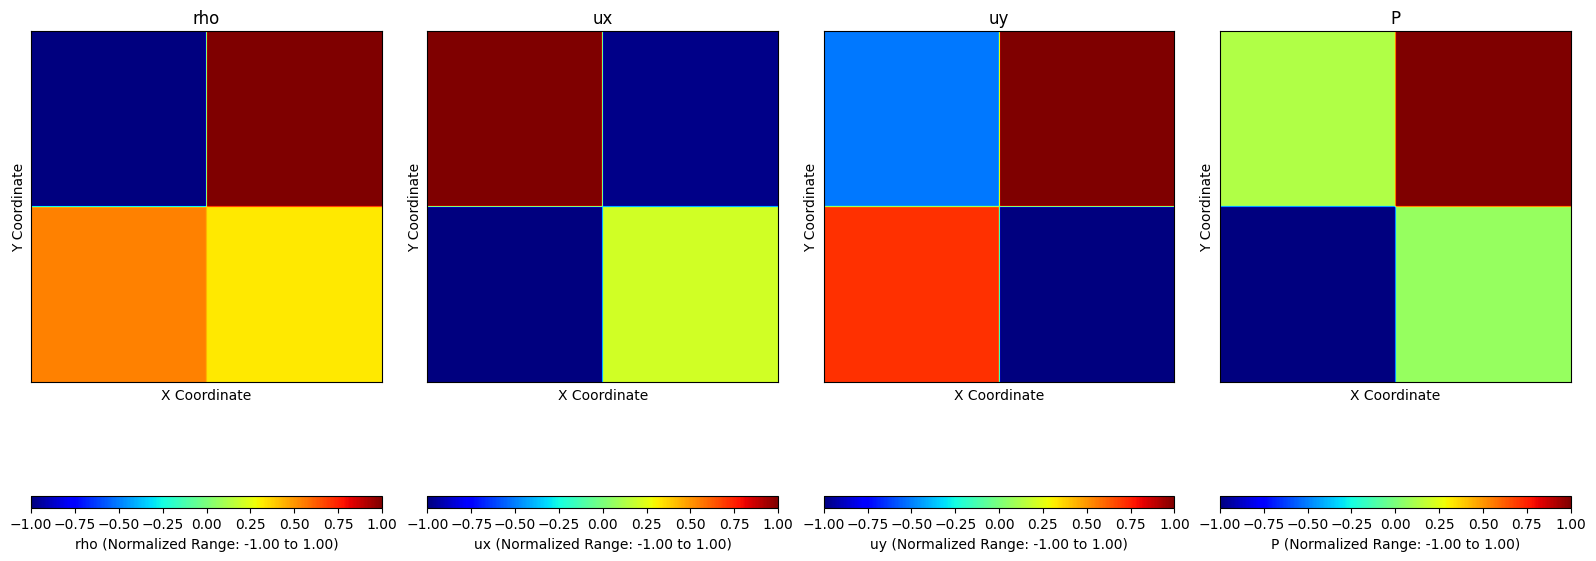

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data for the first simulation and first timestep
# Assuming `results` is the array with shape (simulations, timesteps, channels, N, N)
data = velocity[0, 0, :, :, :]  # Shape: (4, 128, 128), where 4 is the number of channels

# Names for the plots
channel_names = ['rho', 'ux', 'uy', 'P']

# Create the figure
fig, axes = plt.subplots(1, len(channel_names), figsize=(16, 6))

# Choose a more vibrant, multi-hued colormap (e.g., 'jet', 'hsv', 'turbo', 'prism')
cmap_choice = 'jet'

# Normalization function: scale to [-1, 1]
def normalize_field(field):
    field_min = np.min(field)
    field_max = np.max(field)
    if field_max - field_min == 0:
        # If all values are the same, set the normalized field to 0
        return np.zeros_like(field)
    return 2 * (field - field_min) / (field_max - field_min) - 1

# Loop through each channel and create plots
for i, name in enumerate(channel_names):
    ax = axes[i]

    # Normalize the field
    normalized_data = normalize_field(data[i, :, :])

    # Determine vmin and vmax after normalization
    vmin, vmax = -1, 1  # Normalized range is always [-1, 1]

    # Plot the heatmap with the chosen colormap
    im = ax.imshow(normalized_data, cmap=cmap_choice, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Add a colorbar below the plot
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30)
    cbar.set_label(f'{name} (Normalized Range: {vmin:.2f} to {vmax:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()



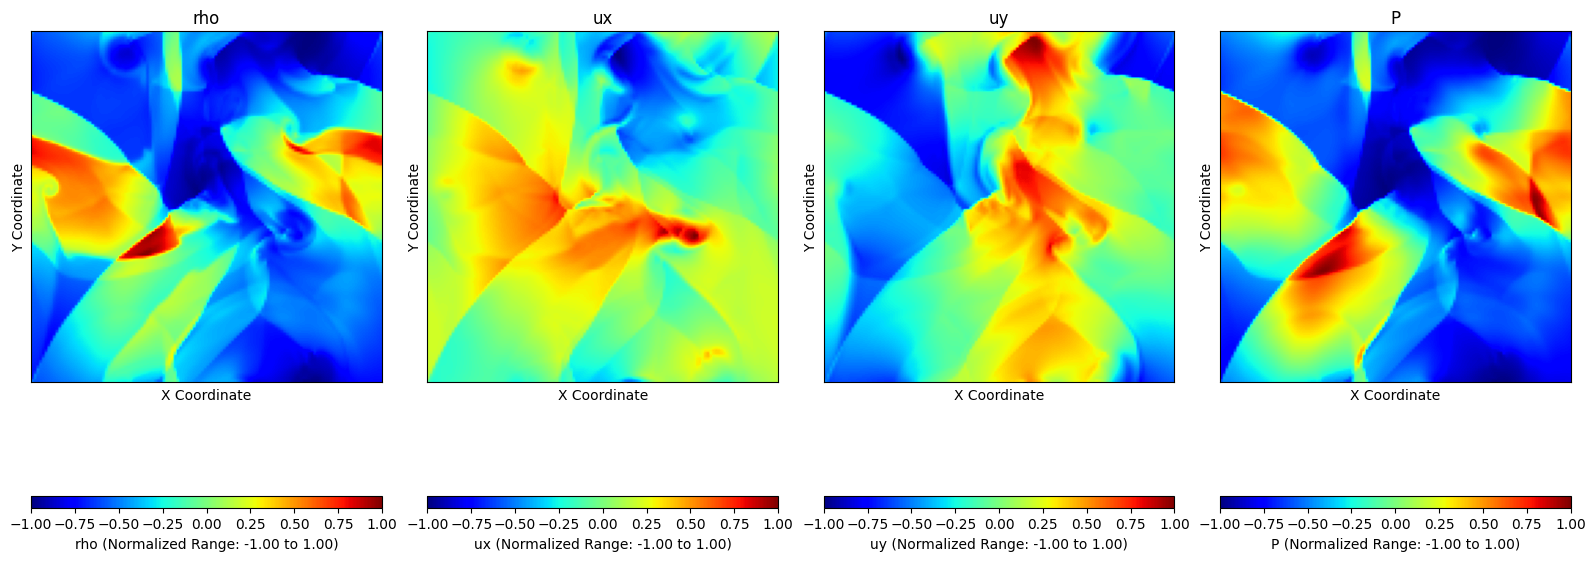

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the data for the first simulation and first timestep
# Assuming `results` is the array with shape (simulations, timesteps, channels, N, N)
data = velocity[1, 20, :, :, :]  # Shape: (4, 128, 128), where 4 is the number of channels

# Names for the plots
channel_names = ['rho', 'ux', 'uy', 'P']

# Create the figure
fig, axes = plt.subplots(1, len(channel_names), figsize=(16, 6))

# Choose a more vibrant, multi-hued colormap (e.g., 'jet', 'hsv', 'turbo', 'prism')
cmap_choice = 'jet'

# Normalization function: scale to [-1, 1]
def normalize_field(field):
    field_min = np.min(field)
    field_max = np.max(field)
    if field_max - field_min == 0:
        # If all values are the same, set the normalized field to 0
        return np.zeros_like(field)
    return 2 * (field - field_min) / (field_max - field_min) - 1

# Loop through each channel and create plots
for i, name in enumerate(channel_names):
    ax = axes[i]

    # Normalize the field
    normalized_data = normalize_field(data[i, :, :])

    # Determine vmin and vmax after normalization
    vmin, vmax = -1, 1  # Normalized range is always [-1, 1]

    # Plot the heatmap with the chosen colormap
    im = ax.imshow(normalized_data, cmap=cmap_choice, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Add a colorbar below the plot
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30)
    cbar.set_label(f'{name} (Normalized Range: {vmin:.2f} to {vmax:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()



Done 0


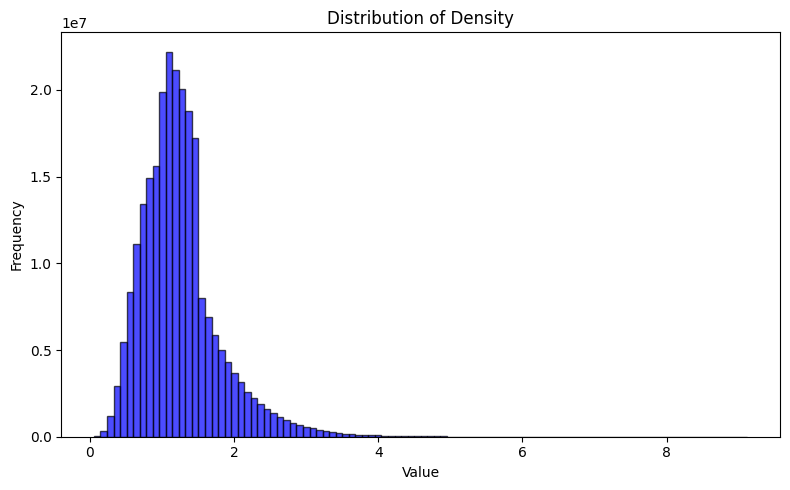

Done Density
Done 1


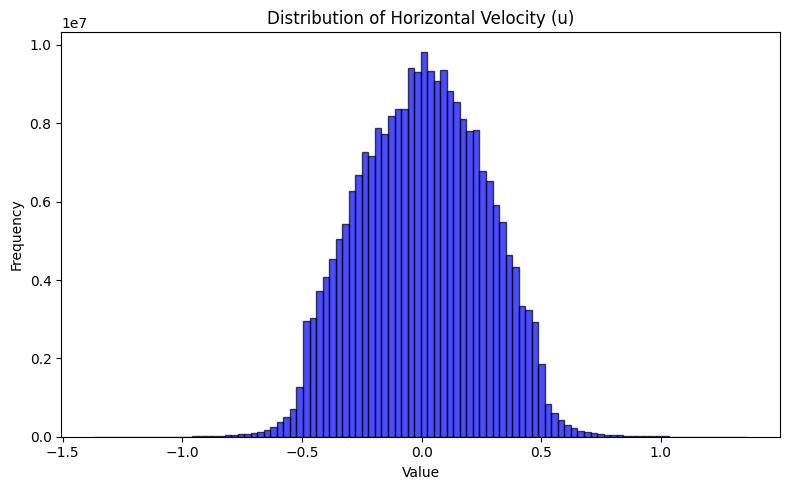

Done Horizontal Velocity (u)
Done 2


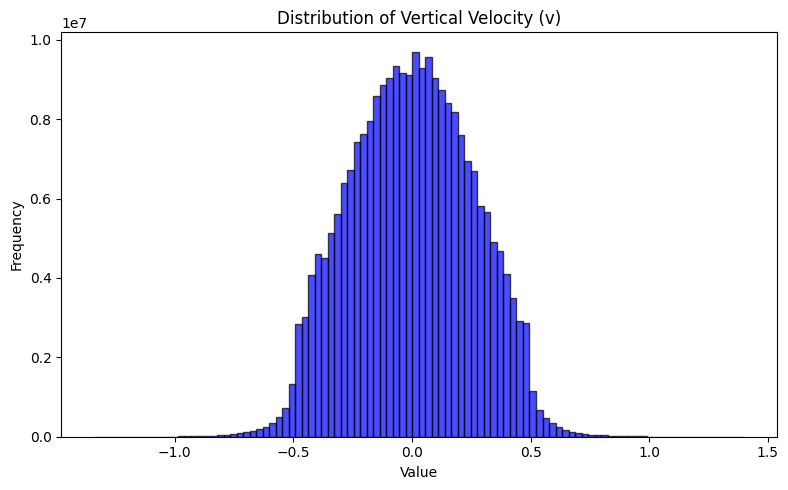

Done Vertical Velocity (v)
Done 3


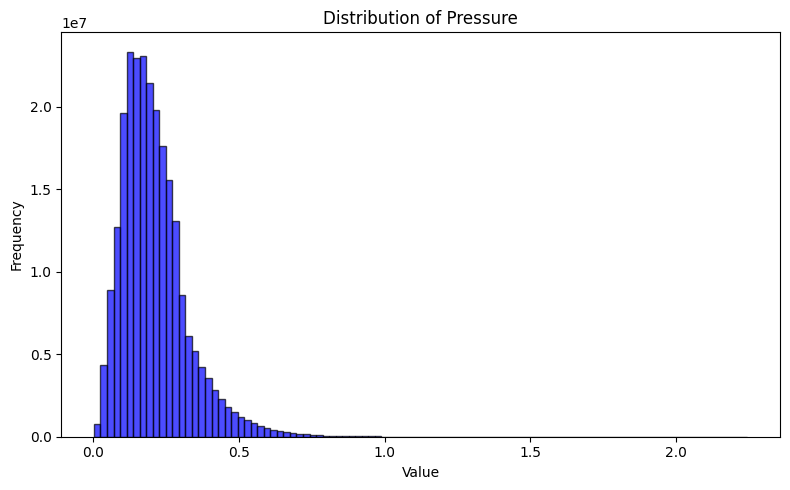

Done Pressure
                             mean       std       min       max  \
Density                  1.252464  0.549725  0.056824  9.120653   
Horizontal Velocity (u)  0.003113  0.258873 -1.369662  1.361803   
Vertical Velocity (v)   -0.001711  0.256285 -1.341075  1.399969   
Pressure                 0.208632  0.114777  0.001876  2.244837   

                         25th_percentile    median  75th_percentile  
Density                         0.895560  1.177889         1.461530  
Horizontal Velocity (u)        -0.189898  0.006482         0.194836  
Vertical Velocity (v)          -0.190809 -0.000392         0.186039  
Pressure                        0.128548  0.188746         0.262308  


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute statistics for each channel
channel_names = ['Density','Horizontal Velocity (u)', 'Vertical Velocity (v)', 'Pressure']
stats = {}

for i, channel_name in enumerate(channel_names):
    channel_data = velocity[:, :, i, :, :].data.flatten()  # Flatten data for statistics
    channel_stats = {
        'mean': np.mean(channel_data),
        'std': np.std(channel_data),
        'min': np.min(channel_data),
        'max': np.max(channel_data),
        '25th_percentile': np.percentile(channel_data, 25),
        'median': np.median(channel_data),
        '75th_percentile': np.percentile(channel_data, 75)
    }
    stats[channel_name] = channel_stats
    print(f'Done {i}')

    # Plot histogram for the channel using matplotlib
    plt.figure(figsize=(8, 5))
    plt.hist(channel_data, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {channel_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f'Done {channel_name}')

# Display statistics
stats_df = pd.DataFrame(stats).T  # Transpose to view channels as rows
print(stats_df)
